In [1]:
import numpy as np
#data preprocessung 
import pandas as pd

#data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

EDA | Processess in EDA
Univariate Analysis (3parts: Measure of Central Tendency, Measure of Dispersion, Interpretation Methods)
Bivariate Analysis(Boxplot, Histogram, Barchart, Piechart, Heatmaps, Scatterplot)
Visualization
Handling Datatypes
Contingency Tables
Correlation and Correlation Plot
Feature Identification
Hypothesis Testing
----
Measure of Central Tendency
Mean
Media
Mode
Some missing datas uses (median/mode) 

Measure of Dispersion
Variance: Dispersion around mean (how far the number from the mean)
Standard Deviation: square root of variance
----
Hypothesis Testing
Determines the probability that a given gypothesis is true
Steps:
1. Formulate Hypothesis
2. Access the truth
3. Compute p Value
4. Compare p value with alpha
5. if p<=alpha then hypothesis is ruled out and alternate hypothesis is valid.

In [2]:
#getting the data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#cek null values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum() / train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

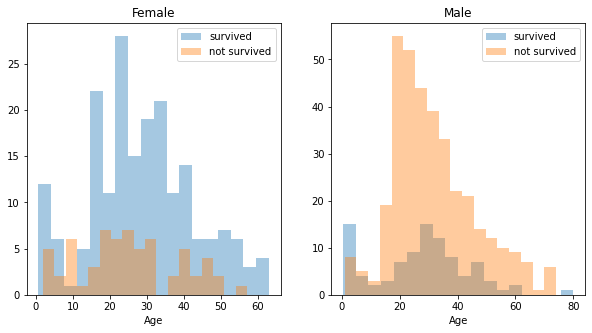

In [8]:
#age and sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
women = train_df[train_df['Sex']== 'female']
men = train_df[train_df['Sex']== 'male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=18, label = not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=18, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')


C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


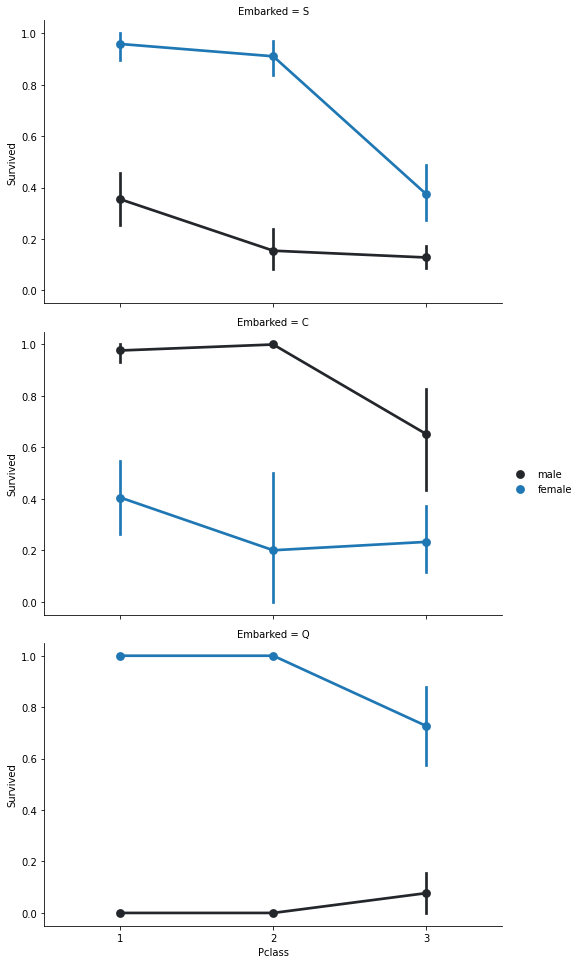

In [16]:
#embarked, Pclass, and sex
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

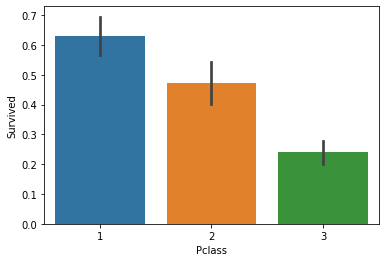

In [9]:
#pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [10]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


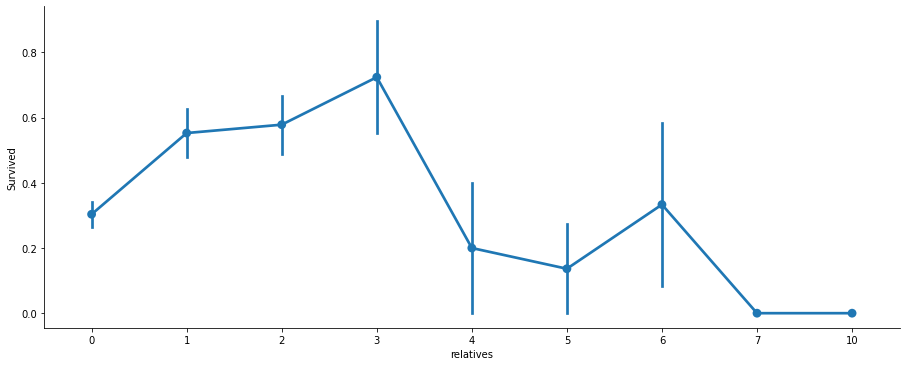

In [11]:
axes = sns.factorplot('relatives', 'Survived', data=train_df, aspect=2.5,)

DATA PREPROCESSING and FEATURE ENGINEERING

In [12]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [13]:
import re
deck = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'E' : 6, 'F' : 7, 'G' : 7, 'U' : 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
#drop cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [14]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [15]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    #compute random number between mean , std and null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill nan valeus in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)
train_df['Age'].isnull().sum()

0

In [16]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
#fill nan values in Embarked feature with mode values
common_values = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_values)

In [18]:
#check missing values in all of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 66.2+ KB


In [19]:
#converting fare datatype to int
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [20]:
data = [train_df, test_df]
titles = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}

for dataset in data:
    #extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #replace title with a more common title or as rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', \
                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mile', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    #convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    #filling nan with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,8,1.0


In [22]:
gender = {'male' : 0, 'female' : 1} 
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [23]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,1,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,0,35,0,0,373450,8,S,0,1,8,1.0
5,0,3,0,27,0,0,330877,8,Q,0,1,8,1.0
6,0,1,0,54,0,0,17463,51,S,0,1,6,1.0
7,0,3,0,2,3,1,349909,21,S,4,0,8,4.0
8,1,3,1,27,0,2,347742,11,S,2,0,8,3.0
9,1,2,1,14,1,0,237736,30,C,1,0,8,3.0


In [24]:
#it's tricky to convert them into useful category (unique values 681)
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [25]:
#drop ticket feature from datasets
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'],axis=1)

In [26]:
#convert embarked feature into numeric
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [27]:
data = [train_df, test_df]

for dataset in data:
    #convert age feature into integer
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

#let's see how it distributes
train_df['Age'].value_counts()


4     171
5     143
3     139
6     115
2     114
1      95
0      68
42     21
41     11
44      9
43      5
Name: Age, dtype: int64

In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0
5,0,3,0,3,0,0,8,2,0,1,8,1.0
6,0,1,0,6,0,0,51,0,0,1,6,1.0
7,0,3,0,0,3,1,21,0,4,0,8,4.0
8,1,3,1,3,0,2,11,0,2,0,8,3.0
9,1,2,1,1,1,0,30,1,1,0,8,3.0


In [30]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250 , 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [31]:
#new feature age class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']

In [33]:
#new feature fare per person
for dataset in data:
    dataset['Fare_per_person'] = dataset['Fare'] / (dataset['relatives']+1)
    dataset['Fare_per_person'] = dataset['Fare_per_person'].astype(int)

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1.0,9,1
6,0,1,0,6,0,0,3,0,0,1,6,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


Modelling

In [34]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acclog = round(logreg.score(X_train, Y_train) * 100, 2)

In [38]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [39]:
#Random Forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [42]:
#Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [54]:
results = pd.DataFrame ({
'Model' : ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
'Score' : [acc_linear_svc, acclog, acc_random_forest, acc_decision_tree] })
result_df = results.sort_values(by = 'Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
80.47,Support Vector Machines
79.57,Logistic Regression


In [55]:
#cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy') #cv=10 means 10 folds
print("Scores: ", score)
print("Mean: ", score.mean())
print("Standard Deviation: ", score.std()) #accuracy 82%

Scores:  [0.78888889 0.82022472 0.75280899 0.82022472 0.88764045 0.84269663
 0.83146067 0.78651685 0.85393258 0.83146067]
Mean:  0.821585518102372
Standard Deviation:  0.036170565898563475


In [56]:
#Feature Importance
importances = pd.DataFrame({'feature' : X_train.columns, 'importance' : np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.202
Sex,0.168
Age_class,0.099
Age,0.083
Deck,0.077
Pclass,0.075
Fare,0.066
relatives,0.062
Embarked,0.051


<AxesSubplot:xlabel='feature'>

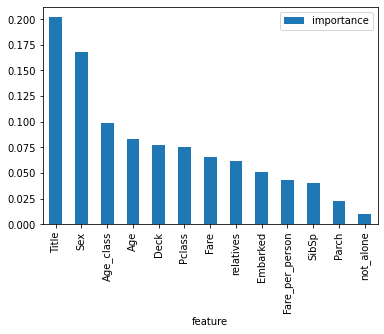

In [57]:
importances.plot.bar()

In [67]:
#hyperparameter tuning
#Random Forest
random_forest = RandomForestClassifier(criterion= "gini",
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        n_estimators=100,
                                        max_features='auto',
                                        oob_score=True,
                                        random_state=1,
                                        n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
print("oob score: ", round(random_forest.oob_score_, 4) *100, "%")

oob score:  82.27 %


In [69]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([[457,  92],
       [ 98, 244]], dtype=int64)

In [70]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(Y_train, predictions))
print("Recall: ", recall_score(Y_train, predictions))

Precision:  0.7261904761904762
Recall:  0.7134502923976608


In [71]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.71976401179941

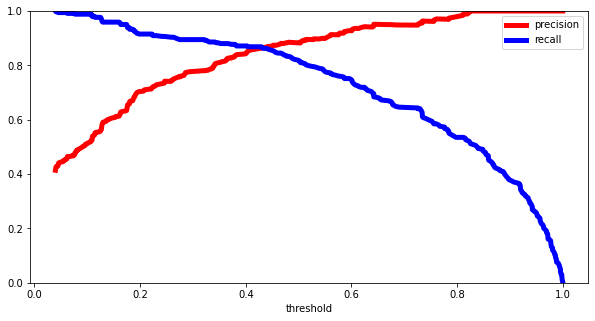

In [78]:
#precision recall 
from sklearn.metrics import precision_recall_curve

#getting the probabilities of our prediction
y_score = random_forest.predict_proba(X_train)
y_score = y_score[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_score)
def plot_precision_recall (precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label='precision', linewidth=5)
    plt.plot(threshold, recall[:-1], 'b', label='recall', linewidth=5)
    plt.xlabel("threshold", fontsize=10)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0,1])

plt.figure(figsize=(10,5))
plot_precision_recall(precision, recall, threshold)
plt.show()

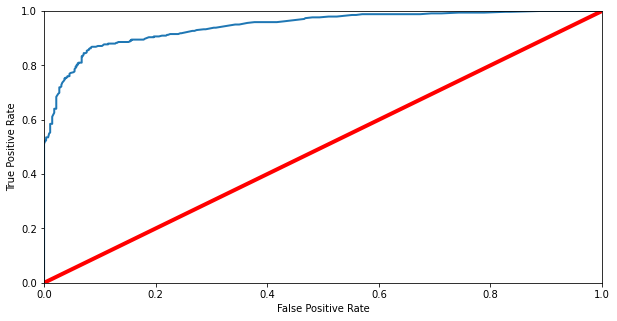

In [79]:
from sklearn.metrics import roc_curve
#compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train, y_score)
#plotting them againts each others
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'r', linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate", fontsize=10)
    plt.ylabel("True Positive Rate", fontsize=10)

plt.figure(figsize=(10,5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_score)
print("ROC - AUC - Score : ", r_a_score)

ROC - AUC - Score :  0.9444284664301921


This project i coded during my learning from udemy course: